In [19]:
from astropy.io import fits, ascii
import numpy as np

datafile = '/Users/yaolun/research/mapping_code/VIRUS-P/CuFcalFeSpesvp_F13_R_0212.fits'
hdu = fits.open(datafile)

In [30]:
hdu[0].header

SIMPLE  =                    T                                                  
BITPIX  =                  -32                                                  
NAXIS   =                    3                                                  
NAXIS1  =                   51                                                  
NAXIS2  =                   50                                                  
NAXIS3  =                  919                                                  
EXTEND  =                    T                                                  
CTYPE1  = 'RA---TAN'                                                            
CRPIX1  = 0.000593551783822477                                                  
CRVAL1  =     148.756912231445                                                  
CTYPE2  = 'DEC--TAN'                                                            
CRPIX2  = 0.000600291125010699                                                  
CRVAL2  =     69.85533142089

In [31]:
ra_cen = hdu[0].header['CRVAL1']
dec_cen = hdu[0].header['CRVAL2']
del_ra = hdu[0].header['CRPIX1']
del_dec = hdu[0].header['CRPIX2']

In [37]:
# load wavelength solution
wavesol = np.load('/Users/yaolun/research/mapping_code/VIRUS-P/WavelengthSolu_M82_F13_R.npy')
outdir = '/Users/yaolun/research/mapping_code/VIRUS-P/spectra/'
foo_coord = open('/Users/yaolun/research/mapping_code/VIRUS-P/CuFcalFeSpesvp_F13_R_0212_coord.txt', 'w')
foo_coord.write('{:<10s}  {:<10s}  {:<10s}\n'.format('Pixel', 'RA(deg)', 'Dec(deg)'))
pix_counter = 1
for x in range(len(hdu[0].data[0,0,:])):
    for y in range(len(hdu[0].data[0,:,0])):
        foo = open(outdir+'CuFcalFeSpesvp_F13_R_0212_pixel'+str(pix_counter)+'.txt', 'w')
#         foo.write('{:<14s}  {:<14s}\n'.format('Wavelength(A)', 'Flux_Density(erg/s/cm2/A)'))
        for i in range(len(wavesol)):
            foo.write('{:<14.8e}  {:<14.8e}\n'.format(wavesol[i], hdu[0].data[i,y,x]))
        foo.close()
        foo_coord.write('{:<10s}  {:<10.7f}  {:<10.7f}\n'.format('pixel'+str(pix_counter),
                                                                 ra_cen+del_ra*(x-25.5),
                                                                 dec_cen+del_dec*(y-25)))
        pix_counter += 1
foo_coord.close()
        

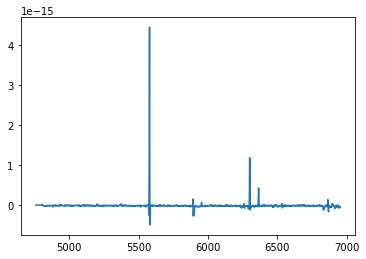

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
data = ascii.read('/Users/yaolun/research/mapping_code/VIRUS-P/spectra/CuFcalFeSpesvp_F13_R_0212_pixel243.txt')
plt.plot(data['Wavelength(A)'], data['Flux_Density(erg/s/cm2/A)'])

In [ ]:
6569, 6559-6580, 6548, 6598